# Using Matplotlib

In [1]:
# required imports
#https://medium.com/analytics-vidhya/generate-a-static-choropleth-india-map-using-corona-virus-pandemic-data-19e9cbf5a07d

import pandas as pd
import seaborn as sns
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
import geopandas as gdp  # conda
import geoplot as gplt # pip
import geoplot.crs as gcrs


sns.set_style('whitegrid')

In C:\Users\Ayush\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\Ayush\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\Ayush\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\Users\Ayush\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\Ayush\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mpl

In [2]:
#Reading the shape file
fp = r'india-polygon.shp'
map_df = gpd.read_file(fp)

map_df.head()

from datetime import date
output_file =  str(date.today())

In [16]:
data = pd.read_csv("13-Dec.csv",index_col=0)
data.iloc[-1:, -4:] = data.iloc[1:-1,-4:].astype(int).sum().to_list()
# data = data.iloc[-1:,-4:]
data
# type(data['10-Mar'][0])

10-Mar 10-Mar.1 10-Mar.2 10-Mar.3 11-Mar 11-Mar.1  \
DATES                                                                           
NUMBERS                       TCIN     TCFN    Cured    Death   TCIN     TCFN   
Andhra Pradesh                   0        0        0        0      0        0   
Andaman and Nicobar Islands      0        0        0        0      0        0   
Arunachal Pradesh                0        0        0        0      0        0   
Assam                            0        0        0        0      0        0   
Bihar                            0        0        0        0      0        0   
Chandigarh                       0        0        0        0      0        0   
Chhattisgarh                     0        0        0        0      0        0   
Dadra and Nagar Haveli           0        0        0        0      0        0   
Delhi                            4        0        0        0      5        0   
Goa                              0        0        0        0      0        0   
Gujarat                          0        0        0        0      0        0   
Haryana                          0       14        0        0      0       14   
Himachal Pradesh                 0        0        0        0      0        0   
Jammu and Kashmir                1        0        0        0      1        0   
Jharkhand                        0        0        0        0      0        0   
Karnataka                        1        0        0        0      4        0   
Kerala                           9        0        0        0     17        0   
Ladakh                           2        0        0        0      2        0   
Madhya Pradesh                   0        0        0        0      0        0   
Maharashtra                      2        0        0        0      2        0   
Manipur                          0        0        0        0      0        0   
Meghalaya                        0        0        0        0      0        0   
Mizoram                          0        0        0        0      0        0   
Nagaland                         0        0        0        0      0        0   
Odisha                           0        0        0        0      0        0   
Puducherry                       0        0        0        0      0        0   
Punjab                           1        0        0        0      1        0   
Rajasthan                        0        2        0        0      1        2   
Sikkim                           0        0        0        0      0        0   
Tamil Nadu                       1        0        0        0      1        0   
Telengana                        1        0        0        0      1        0   
Tripura                          0        0        0        0      0        0   
Uttarakhand                      0        0        0        0      0        0   
Uttar Pradesh                    9        0        0        0      9        0   
West Bengal                      0        0        0        0      0        0   
Totals                          31       16        0        0     44       16   

                            11-Mar.2 11-Mar.3 12-Mar 12-Mar.1  ... 10-Dec.2  \
DATES                                                          ...            
NUMBERS                        Cured    Death   TCIN     TCFN  ...    Cured   
Andhra Pradesh                     0        0      1        0  ...   861153   
Andaman and Nicobar Islands        0        0      0        0  ...     4647   
Arunachal Pradesh                  0        0      0        0  ...    15697   
Assam                              0        0      0        0  ...   209625   
Bihar                              0        0      0        0  ...   233298   
Chandigarh                         0        0      0        0  ...    17128   
Chhattisgarh                       0        0      0        0  ...   228304   
Dadra and Nagar Haveli             0        0      0        0  ...     3331   

In [17]:
total_cases = pd.DataFrame()
total_cured = pd.DataFrame()
total_deaths = pd.DataFrame()

In [18]:
i=1
for col in data.columns:
    if i%4==1:total_cases[col]=data[col]
    if i%4==3:total_cured[col]=data[col]
    if i%4==0:total_deaths[col]=data[col]
    i+=1

In [20]:
total_cases.drop(index='NUMBERS', axis=0, inplace=True)
total_cured.drop(index='NUMBERS', axis=0, inplace=True)
total_deaths.drop(index='NUMBERS', axis=0, inplace=True)
total_cases = total_cases.astype(int)
total_cured = total_cured.astype(int)
total_deaths = total_deaths.astype(int)

In [21]:
tot = total_cases.copy().transpose()
cur = total_cured.copy().transpose()
dea = total_deaths.copy().transpose()
cur.index = tot.index
dea.index = tot.index
active_cases = pd.DataFrame()
for col in tot:
    active_cases[col] = tot[col]-(cur[col]+dea[col])
    
active_cases

Andhra Pradesh  Andaman and Nicobar Islands  Arunachal Pradesh  Assam  \
10-Mar               0                            0                  0      0   
11-Mar               0                            0                  0      0   
12-Mar               1                            0                  0      0   
13-Mar               1                            0                  0      0   
14-Mar               1                            0                  0      0   
...                ...                          ...                ...    ...   
8-Dec             5626                           81                707   3585   
9-Dec             5429                           70                692   3575   
10-Dec            5259                           75                709   3542   
11-Dec            5237                           78                685   3516   
12-Dec            5236                           78                279   3493   

        Bihar  Chandigarh  Chhattisgarh  Dadra and Nagar Haveli  Delhi   Goa  \
10-Mar      0           0             0                       0      4     0   
11-Mar      0           0             0                       0      5     0   
12-Mar      0           0             0                       0      6     0   
13-Mar      0           0             0                       0      6     0   
14-Mar      0           0             0                       0      5     0   
...       ...         ...           ...                     ...    ...   ...   
8-Dec    5467         921         19589                      16  22486  1297   
9-Dec    5459         962         19516                      19  22310  1310   
10-Dec   5354         897         19778                      21  20546  1277   
11-Dec   5499         881         19346                      20  18753  1213   
12-Dec   5527         838         18346                      18  18676  1187   

        ...  Punjab  Rajasthan  Sikkim  Tamil Nadu  Telengana  Tripura  \
10-Mar  ...       1          0       0           1          1        0   
11-Mar  ...       1          1       0           1          1        0   
12-Mar  ...       1          1       0           1          1        0   
13-Mar  ...       1          1       0           1          1        0   
14-Mar  ...       1          0       0           1          1        0   
...     ...     ...        ...     ...         ...        ...      ...   
8-Dec   ...    7604      21671     371       10695       7696      427   
9-Dec   ...    7274      20875     363       10588       7661      403   
10-Dec  ...    7325      19792     368       10491       7497      399   
11-Dec  ...    7423      19030     367       10392       7604      373   
12-Dec  ...    7286      17721     363       10299       7670      355   

        Uttarakhand  Uttar Pradesh  West Bengal  Totals  
10-Mar            0              9            0      31  
11-Mar            0              9            0      44  
12-Mar            0             10            0      54  
13-Mar            0             10            0      60  
14-Mar            0              6            0      55  
...             ...            ...          ...     ...  
8-Dec          5234          21732        23829  383866  
9-Dec          5399          21374        23750  378909  
10-Dec         5456          20658        23650  372293  
11-Dec         5742          20801        23451  363749  
12-Dec         5934          20473        23281  359819  

[278 rows x 36 columns]

ValueError: zero-size array to reduction operation minimum which has no identity

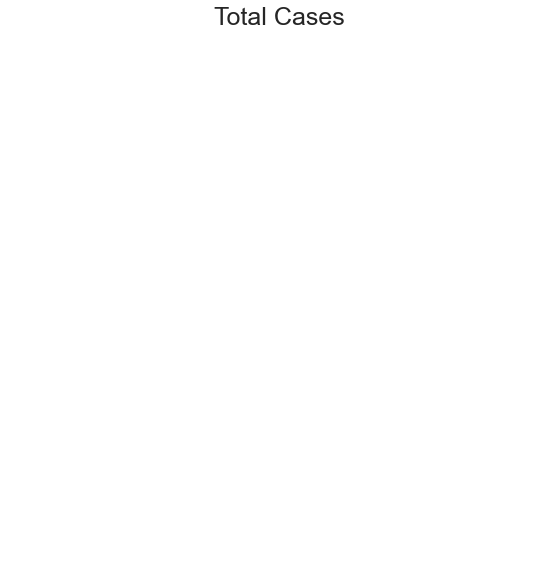

In [22]:
# Generates Total Cases Map
dfm = total_cases.copy()
dfm.drop(dfm.tail(1).index,inplace=True)
for i in list(dfm):
    
    if ((i[0]=='0'and i[1]=='1') or (i[0]=='1'and i[1]=='-')):
        clmn = dfm.index
        df = pd.DataFrame(clmn,columns=['Name of State/UN'])
        df['total_cases'] = list(dfm[i])
        merged = map_df.set_index('st_nm').join(df.set_index('Name of State/UN'))
        merged.head()
        fig, ax = plt.subplots(1, figsize=(10, 10))
        ax.axis('off')
        ax.set_title('Total Cases', fontdict={'fontsize': '25', 'fontweight' : '10'})
        dest = 'Images/total_cases/' + i + '.png'
        # plot the figure
        merged.plot(column='total_cases',cmap='YlOrRd', linewidth=0.8, ax=ax, edgecolor='0', legend=True,legend_kwds={'shrink': 0.6},markersize=[39.739192, -104.990337])
        import matplotlib.pyplot as plt
        plt.savefig(dest, dpi=300, bbox_inches='tight')

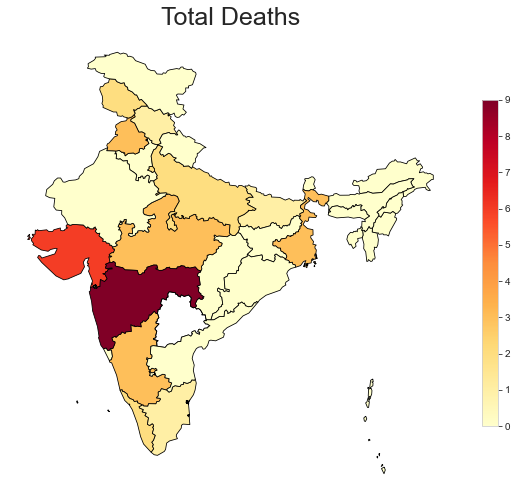

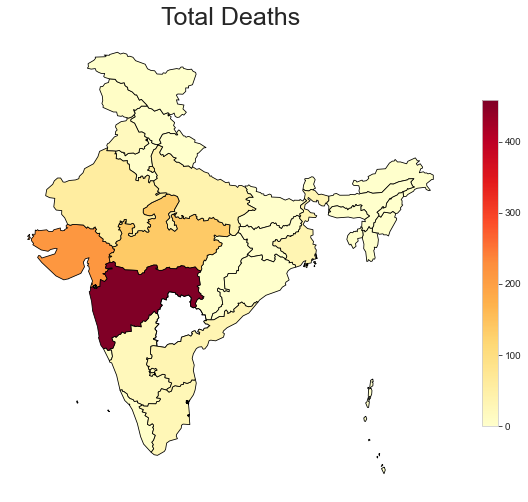

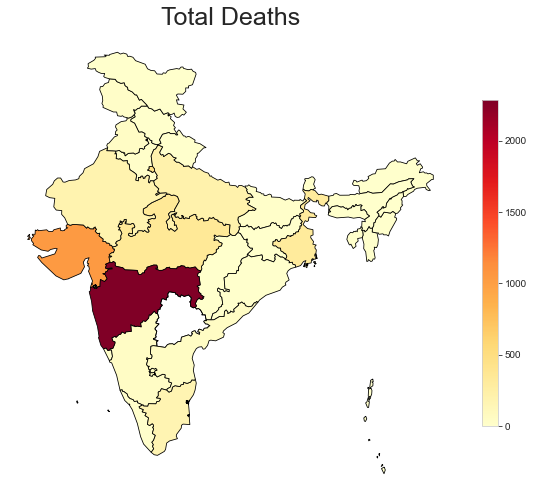

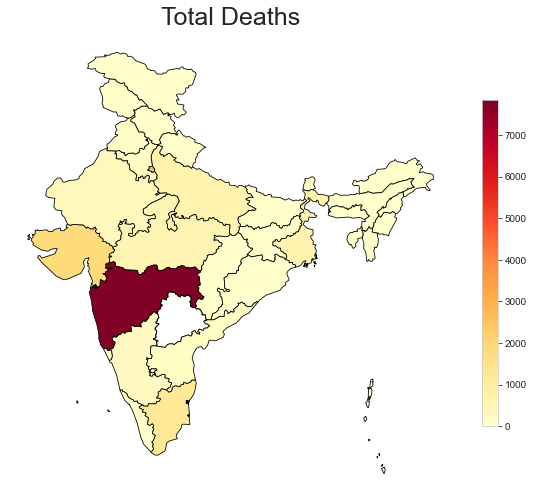

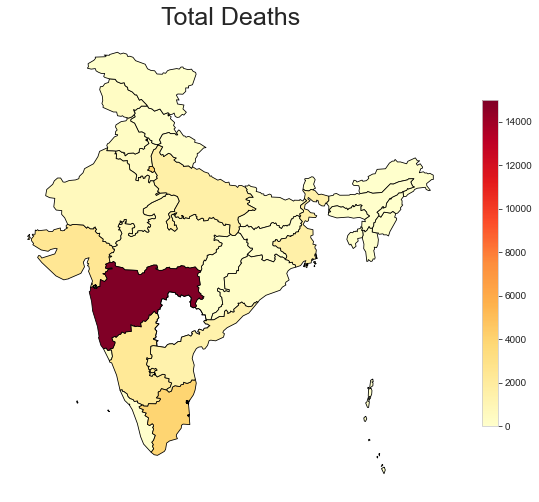

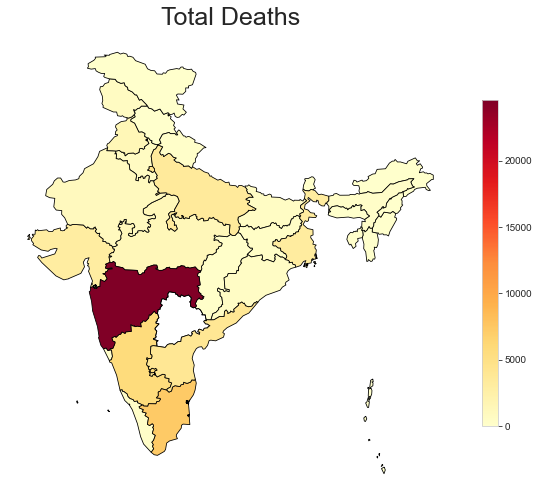

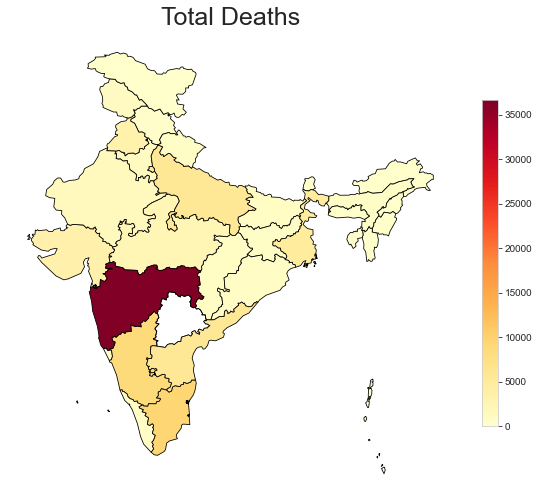

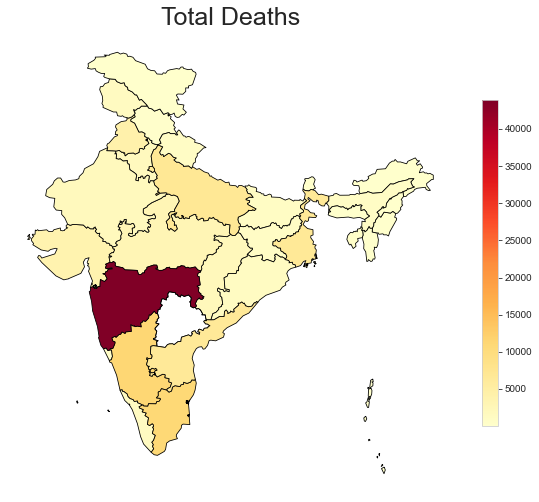

In [9]:
# Generates Total Deaths Map
dfm = total_deaths.copy()
dfm.drop(dfm.tail(1).index,inplace=True)
for i in list(dfm):
    
    if ((i[0]=='0'and i[1]=='1') or (i[0]=='1'and i[1]=='-')):
        clmn = dfm.index
        df = pd.DataFrame(clmn,columns=['Name of State/UN'])
        df['total_deaths'] = list(dfm[i])
        merged = map_df.set_index('st_nm').join(df.set_index('Name of State/UN'))
        merged.head()
        fig, ax = plt.subplots(1, figsize=(10, 10))
        ax.axis('off')
        ax.set_title('Total Deaths', fontdict={'fontsize': '25', 'fontweight' : '10'})
        dest = 'Images/deaths/' + i + '.png'
        # plot the figure
        merged.plot(column='total_deaths',cmap='YlOrRd', linewidth=0.8, ax=ax, edgecolor='0', legend=True,legend_kwds={'shrink': 0.6},markersize=[39.739192, -104.990337])
        import matplotlib.pyplot as plt
        plt.savefig(dest, dpi=300, bbox_inches='tight')

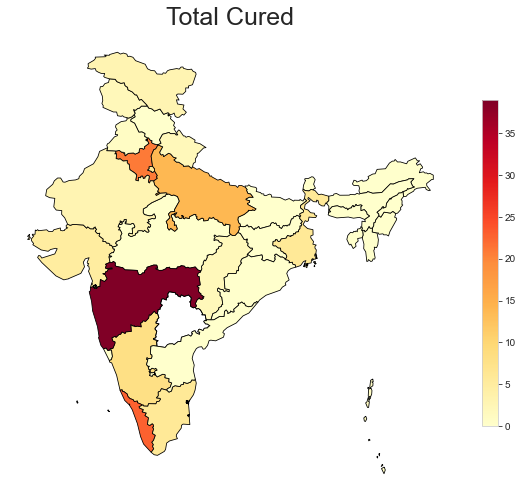

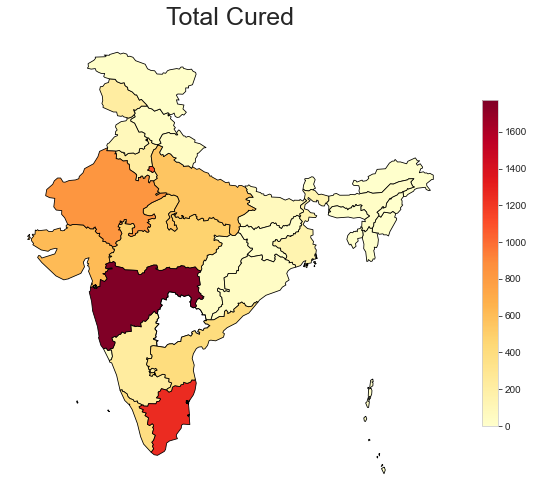

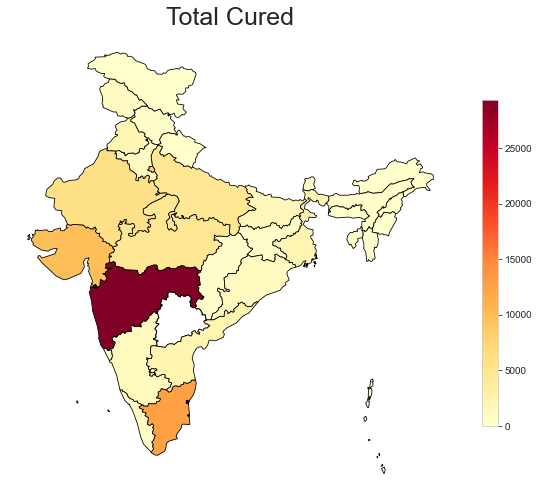

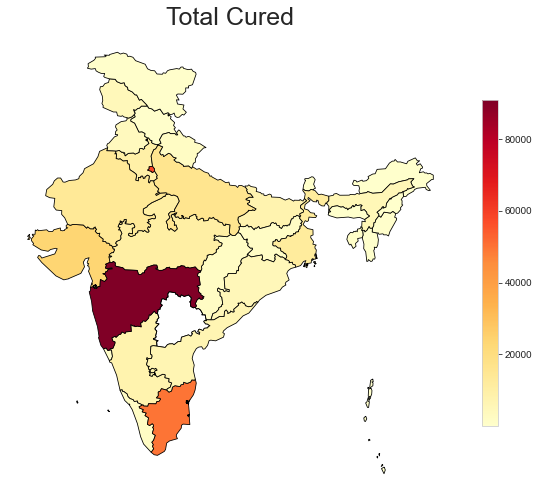

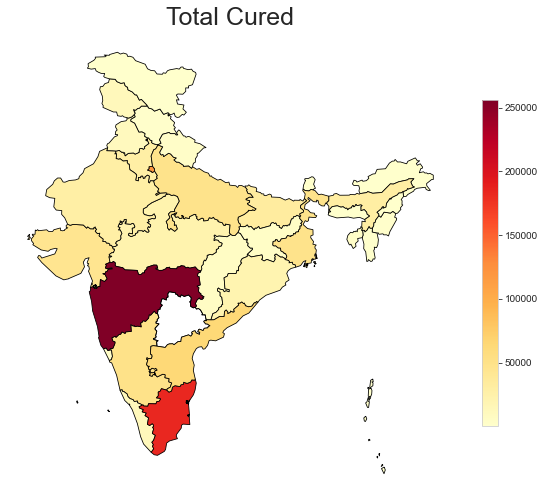

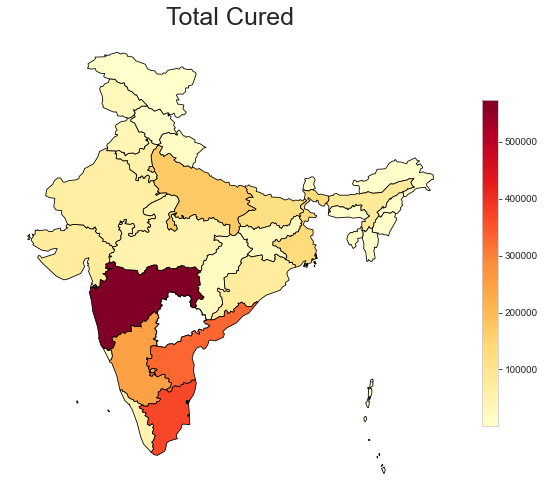

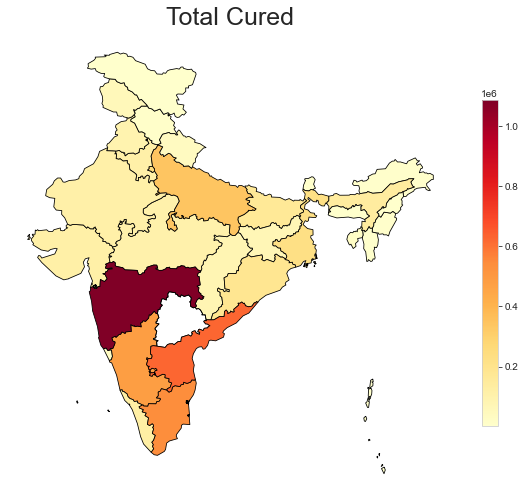

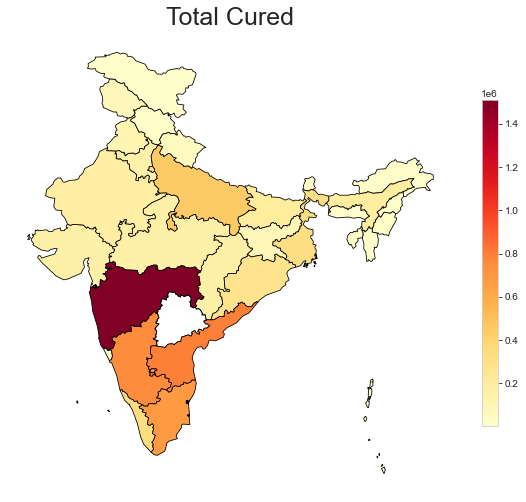

In [10]:
# Generates Total Cured Map 
dfm = total_cured.copy()
dfm.drop(dfm.tail(1).index,inplace=True)
for i in list(dfm):
    
    if ((i[0]=='0'and i[1]=='1') or (i[0]=='1'and i[1]=='-')):
        clmn = dfm.index
        df = pd.DataFrame(clmn,columns=['Name of State/UN'])
        df['total_cured'] = list(dfm[i])
        merged = map_df.set_index('st_nm').join(df.set_index('Name of State/UN'))
        merged.head()
        fig, ax = plt.subplots(1, figsize=(10, 10))
        ax.axis('off')
        ax.set_title('Total Cured', fontdict={'fontsize': '25', 'fontweight' : '10'})
        dest = 'Images/cured_cases/' + i + '.png'
        # plot the figure
        merged.plot(column='total_cured',cmap='YlOrRd', linewidth=0.8, ax=ax, edgecolor='0', legend=True,legend_kwds={'shrink': 0.6},markersize=[39.739192, -104.990337])
        import matplotlib.pyplot as plt
        plt.savefig(dest, dpi=300, bbox_inches='tight')

In [39]:
from datetime import timedelta, date

def daterange(date1, date2):
    for n in range(int ((date2 - date1).days)+1):
        yield date1 + timedelta(n)

start_dt = date(2020, 4, 15)
end_dt = date(2020, 12, 1)
time_axis = []
for dt in daterange(start_dt, end_dt):
    time_axis.append(dt)
print(len(time_axis))

231


In [40]:
cases = total_cases.copy().transpose()
cases = cases[36:-11]
cases

DATES   Andhra Pradesh  Andaman and Nicobar Islands  Arunachal Pradesh  \
15-Apr             503                           11                  1   
16-Apr             534                           11                  1   
17-Apr             572                           11                  1   
18-Apr             603                           12                  1   
19-Apr             603                           14                  1   
...                ...                          ...                ...   
27-Nov          865705                         4682              16204   
28-Nov          866438                         4689              16231   
29-Nov          867063                         4698              16262   
30-Nov          867683                         4704              16269   
1-Dec           868064                         4710              16282   

DATES    Assam   Bihar  Chandigarh  Chhattisgarh  Dadra and Nagar Haveli  \
15-Apr      33      70          21            33                       0   
16-Apr      33      74          21            33                       0   
17-Apr      35      83          21            36                       0   
18-Apr      35      85          21            36                       0   
19-Apr      35      86          23            36                       0   
...        ...     ...         ...           ...                     ...   
27-Nov  212171  232235       17051        230956                    3328   
28-Nov  212320  232916       17157        232835                    3330   
29-Nov  212483  233572       17246        234725                    3330   
30-Nov  212617  234119       17342        235998                    3332   
1-Dec   212776  234610       17409        237322                    3332   

DATES    Delhi    Goa  ...  Punjab  Rajasthan  Sikkim  Tamil Nadu  Telengana  \
15-Apr    1561      7  ...     186       1005       0        1204        647   
16-Apr    1578      7  ...     186       1023       0        1242        698   
17-Apr    1640      7  ...     186       1131       0        1267        743   
18-Apr    1707      7  ...     202       1229       0        1323        791   
19-Apr    1893      7  ...     219       1351       0        1372        844   
...        ...    ...  ...     ...        ...     ...         ...        ...   
27-Nov  551262  47341  ...  149278     256947    4871      776174     267665   
28-Nov  556744  47491  ...  150086     260040    4908      777616     268418   
29-Nov  561742  47689  ...  150805     262805    4967      779046     269223   
30-Nov  566648  47804  ...  151538     265386    4985      780505     269816   
1-Dec   570374  47963  ...  152091     268063    4989      781915     270318   

DATES   Tripura  Uttarakhand  Uttar Pradesh  West Bengal   Totals  
15-Apr        2           37            735          213    11933  
16-Apr        2           37            773          231    12759  
17-Apr        2           37            846          255    13835  
18-Apr        2           42            969          287    14792  
19-Apr        2           42           1084          310    16116  
...         ...          ...            ...          ...      ...  
27-Nov    32610        72997         535449       470498  9309787  
28-Nov    32641        73527         537747       473987  9351109  
29-Nov    32674        73951         539899       477446  9392919  
30-Nov    32695        74340         541873       480813  9431691  
1-Dec     32726        74795         543888       483484  9462809  

[231 rows x 36 columns]

In [43]:
# cases = total_cases.copy().transpose()
date= pd.to_datetime(time_axis)
cases['date'] = date
active = active_cases.copy()[36:-11]
active['date'] = date
active

Andhra Pradesh  Andaman and Nicobar Islands  Arunachal Pradesh  Assam  \
15-Apr             478                            1                  1     32   
16-Apr             500                            1                  1     27   
17-Apr             522                            1                  1     29   
18-Apr             546                            1                  1     25   
19-Apr             546                            3                  1     22   
...                ...                          ...                ...    ...   
27-Nov           12615                          130                926   3285   
28-Nov           12137                          120                911   3272   
29-Nov           11571                          119                888   3313   
30-Nov            8397                          106                851   3350   
1-Dec             7840                           99                817   3399   

        Bihar  Chandigarh  Chhattisgarh  Dadra and Nagar Haveli  Delhi   Goa  \
15-Apr     40          14            20                       0   1501     2   
16-Apr     44          14            16                       0   1504     2   
17-Apr     45          12            13                       0   1551     1   
18-Apr     46          12            12                       0   1593     1   
19-Apr     47          13            12                       0   1778     1   
...       ...         ...           ...                     ...    ...   ...   
27-Nov   5390        1169         23957                      33  38734  1316   
28-Nov   5401        1190         21839                      27  38181  1313   
29-Nov   5380        1115         20978                      23  36578  1348   
30-Nov   5404        1140         20641                      22  35091  1327   
1-Dec    5359        1062         19635                      16  32885  1335   

        ...  Rajasthan  Sikkim  Tamil Nadu  Telengana  Tripura  Uttarakhand  \
15-Apr  ...        855       0        1111        509        2           28   
16-Apr  ...        873       0        1110        560        1           28   
17-Apr  ...        956       0        1072        539        1           28   
18-Apr  ...       1035       0        1025        587        1           33   
19-Apr  ...       1157       0         992        640        1           33   
...     ...        ...     ...         ...        ...      ...          ...   
27-Nov  ...      27302     268       11173      10839      741         4682   
28-Nov  ...      28183     264       11109      10637      703         4812   
29-Nov  ...      28751     288       11073      10490      649         4876   
30-Nov  ...      28758     268       11052      10022      595         4970   
1-Dec   ...      28653     248       10997       9627      592         5059   

        Uttar Pradesh  West Bengal  Totals       date  
15-Apr            673          169   10197 2020-04-15  
16-Apr            692          182   10824 2020-04-16  
17-Apr            758          194   11616 2020-04-17  
18-Apr            869          222   12289 2020-04-18  
19-Apr            959          236   13295 2020-04-19  
...               ...          ...     ...        ...  
27-Nov          25422        24670  455555 2020-11-27  
28-Nov          25639        24617  454940 2020-11-28  
29-Nov          25243        24537  453956 2020-11-29  
30-Nov          24575        24405  446952 2020-11-30  
1-Dec           24099        24298  435603 2020-12-01  

[231 rows x 37 columns]

In [44]:
other_states = [col for col in cases.columns if col not in ["Delhi", "Maharashtra", "Tamil Nadu","Andhra Pradesh", "Totals"]]

In [45]:
cases["Rest of India"] = cases[other_states].sum(axis=1)
# active["Rest of India"] = active_cases[other_states].sum(axis=1)

In [46]:
plot_cases = cases[["Delhi", "Maharashtra", "Tamil Nadu","Andhra Pradesh", "Rest of India"]]
major_affected = cases[["Maharashtra", "Tamil Nadu","Andhra Pradesh", "Karnataka"]]
eastern_states = cases[["West Bengal", "Jharkhand", "Bihar", "Odisha"]]
northern_states = cases[["Uttar Pradesh", "Punjab",  "Rajasthan", "Haryana"]]
small_states = cases[["Chandigarh", "Goa", "Sikkim", "Tripura"]]

# plot_active = active[["Delhi", "Maharashtra", "Tamil Nadu", "Rest of India"]]

In [47]:
date = pd.DataFrame(date)
date.iloc[:,0].dt.is_month_start
plt.rcParams['figure.figsize'] = 12, 6
plt.style.use("fivethirtyeight")

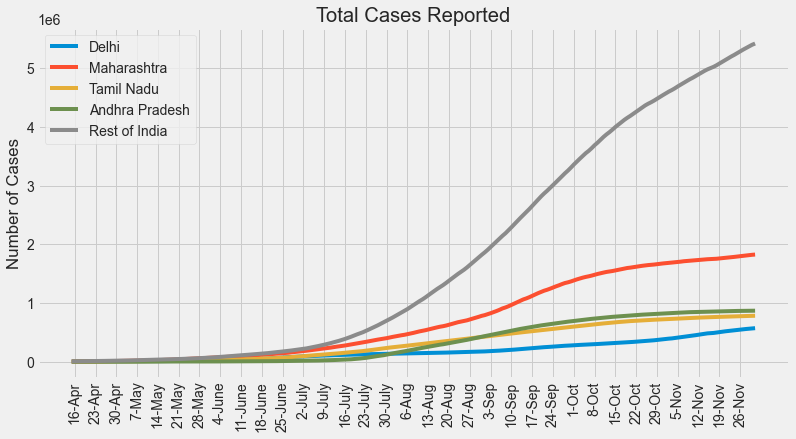

In [48]:
fig = plt.plot(plot_cases.index,plot_cases)
plt.title("Total Cases Reported")
plt.legend(labels=["Delhi", "Maharashtra", "Tamil Nadu", "Andhra Pradesh", "Rest of India"])
plt.xticks(ticks=range(1,date.shape[0],7), rotation=90)
plt.ylabel("Number of Cases")
plt.savefig('Images/comparison.png', dpi=300, bbox_inches='tight')
plt.show()

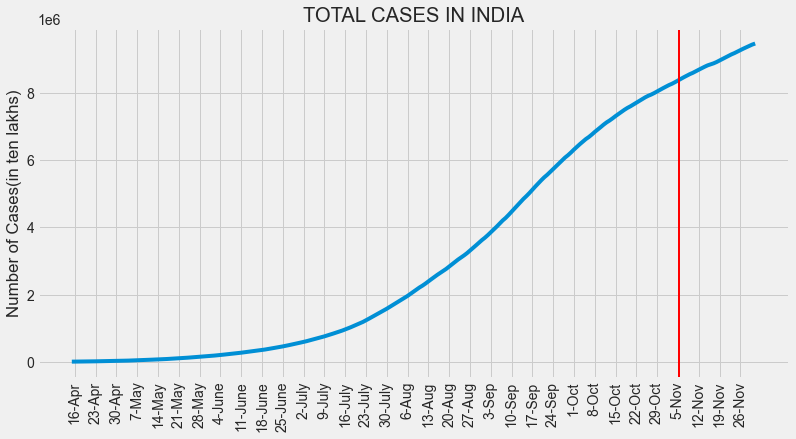

In [49]:
from pylab import text
fig = plt.plot(cases.index,cases["Totals"])
plt.title("TOTAL CASES IN INDIA")
# plt.legend(labels=[])
plt.xticks(ticks=range(1,date.shape[0],7), rotation=90)
plt.ylabel("Number of Cases(in ten lakhs)")
plt.axvline(x=204.5, color="red", linewidth=2)
# plt.grid(b=None)
# text(0.6, 0.5,'Red Line denotes split of training dataset upto 31st September',
#      horizontalalignment='center',
#      verticalalignment='center',
#      transform = ax.transAxes)
plt.savefig('Images/all_india.png', dpi=300, bbox_inches='tight')
plt.show()

In [12]:
confirmed_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
deaths_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
recovered_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')
latest_data = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/04-04-2020.csv')


C:\Users\Ayush\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)
C:\Users\Ayush\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:245: MatplotlibDeprecationWarning: 
The epoch2num function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  base = dates.epoch2num(dt.asi8 / 1.0e9)


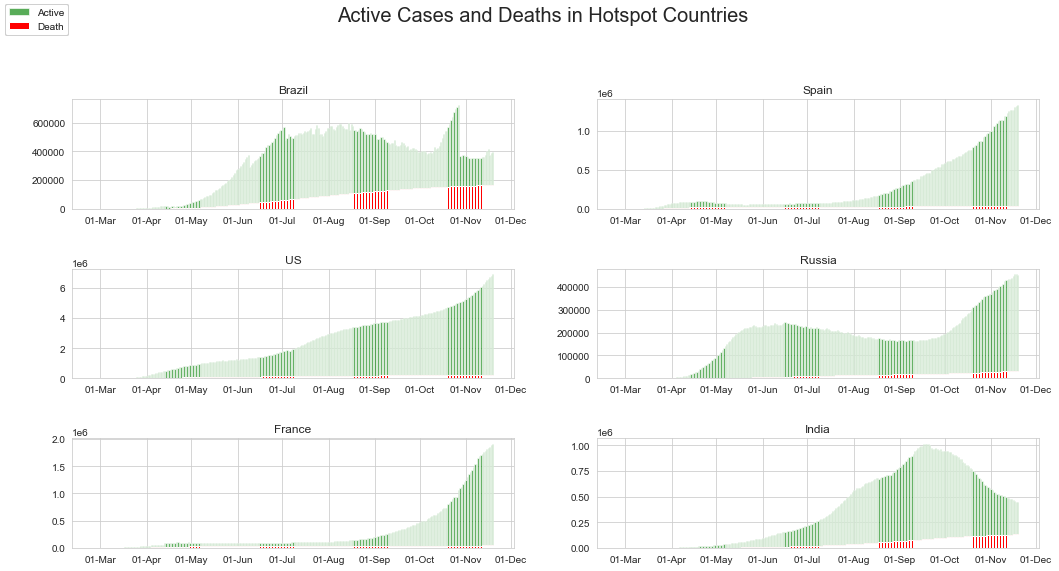

In [14]:
import matplotlib.dates as mdates

hotspots = ['Brazil','Spain','US', 'Russia','France','India']
dates = list(confirmed_df.columns[4:])
dates = list(pd.to_datetime(dates))
dates_india = dates[33:]

df1 = confirmed_df.groupby('Country/Region').sum().reset_index()
df2 = deaths_df.groupby('Country/Region').sum().reset_index()
df3 = recovered_df.groupby('Country/Region').sum().reset_index()

global_confirmed = {}
global_deaths = {}
global_recovered = {}
global_active= {}

for country in hotspots:
    k =df1[df1['Country/Region'] == country].loc[:,'1/30/20':]
    global_confirmed[country] = k.values.tolist()[0][25:]

    k =df2[df2['Country/Region'] == country].loc[:,'1/30/20':]
    global_deaths[country] = k.values.tolist()[0][25:]

    k =df3[df3['Country/Region'] == country].loc[:,'1/30/20':]
    global_recovered[country] = k.values.tolist()[0][25:]
    
for country in hotspots:
    k = list(map(int.__sub__, global_confirmed[country], global_deaths[country]))
    global_active[country] = list(map(int.__sub__, k, global_recovered[country]))
    
fig = plt.figure(figsize= (15,15))
plt.suptitle('Active Cases and Deaths in Hotspot Countries',fontsize = 20,y=1.0)
#plt.legend()
k=0
for i in range(1,7):
    ax = fig.add_subplot(6,2,i)
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%b'))
    ax.bar(dates_india,global_active[hotspots[k]],color = 'green',alpha = 0.6,label = 'Active')
#     ax.bar(dates_india,global_recovered[hotspots[k]],color='grey',label = 'Recovered');
    ax.bar(dates_india,global_deaths[hotspots[k]],color='red',label = 'Death')
#     ax.set_facecolor('#000000')
    plt.title(hotspots[k])
    handles, labels = ax.get_legend_handles_labels()
    fig.legend(handles, labels, loc='upper left')
    k=k+1

plt.tight_layout(pad=3.0)
plt.savefig('Images/global.png', dpi=300, bbox_inches='tight')
plt.show()

In [50]:
plot_cases = pd.concat([plot_cases,cases['date']], axis=1)
major_affected = pd.concat([major_affected,cases['date']], axis=1)
eastern_states = pd.concat([eastern_states,cases['date']], axis=1)
northern_states = pd.concat([northern_states,cases['date']], axis=1)
small_states = pd.concat([small_states,cases['date']], axis=1)
# plot_active = pd.concat([plot_active,cases['date']], axis=1)

In [51]:
import requests
import re
indiaLiveJson = 'https://api.covid19india.org/data.json'
r = requests.get(indiaLiveJson)
indiaData = r.json()

testingHistory = pd.DataFrame()
testingNO = []
testedPos = []
timeStamp = []
for index in range(len(indiaData['tested'])):
    try:
        testingNO.append(int(re.sub(',','',indiaData['tested'][index]['totalindividualstested'])))
        testedPos.append(int(re.sub(',','',indiaData['tested'][index]['totalpositivecases'])))
    except:
        testingNO.append(testingNO[len(testingNO)-1])
        testedPos.append(testedPos[len(testedPos)-1])
        
    timeStamp.append(indiaData['tested'][index]['updatetimestamp'][:-9])
    
testingHistory['testing_no'] = testingNO[:-1]
testingHistory['testing_pos'] = testedPos
testingHistory['time_stamp'] = timeStamp

testingHistory.drop_duplicates(subset ="time_stamp", 
                     keep = False, inplace = True) 


fig = go.Figure()

fig = fig.add_trace(go.Scatter(y=testingHistory['testing_no'], x=testingHistory['time_stamp'],
#                     mode='lines+markers',
                    name='Testing Pattern'))

fig = fig.add_trace(go.Scatter(y=testingHistory['testing_pos'], x=testingHistory['time_stamp'],
#                     mode='lines+markers',
                    name='Tested Positive'))

fig = fig.update_layout(
    title="India COVID-19 Daily Testing History",
    xaxis_title="Date",
    yaxis_title="Number of Tests",
    
)

fig.write_image('Images/daily_testing.png')
fig.show()

NameError: name 'go' is not defined

In [52]:
import plotly.express as px
fig = px.bar(testingHistory, x="time_stamp", y="testing_no", barmode='group',height=500,color = "testing_no",
             orientation = 'v',color_discrete_sequence = px.colors.sequential.Plasma_r)
fig.update_layout(title_text='Number of COVID-19 test conducted everyday',plot_bgcolor='rgb(275, 270, 273)')
fig.update_layout(barmode='stack')
fig.update_layout(plot_bgcolor='rgb(275, 270, 273)',yaxis_title='Tests',xaxis_title='Date')
fig.show()

In [116]:
from bokeh.plotting import ColumnDataSource, figure, output_notebook, show
PATH_COVID = "/kaggle/input/covid19-in-india/covid_19_india.csv"
PATH_CENSUS = "/kaggle/input/covid19-in-india/population_india_census2011.csv"
PATH_TESTS = "/kaggle/input/covid19-in-india/ICMRTestingDetails.csv"
PATH_LABS = "/kaggle/input/covid19-in-india/ICMRTestingLabs.csv"
PATH_HOSPITALS = "/kaggle/input/covid19-in-india/HospitalBedsIndia.csv"
PATH_GLOBAL = "/kaggle/input/novel-corona-virus-2019-dataset/covid_19_data.csv"
PATH_METADATA = "/kaggle/input/covid19-forecasting-metadata/region_metadata.csv"
PATH_AQI = "/kaggle/input/air-quality-data-in-india/city_day.csv"

def read_covid_data():
    """
    Reads the main covid-19 India data and preprocesses it.
    """
    
    df = pd.read_csv(PATH_COVID)
    df.rename(columns = {
        "State/UnionTerritory": "state",
        "Confirmed": "cases",
        "Deaths": "deaths",
        "Cured": "recoveries"
    }, inplace = True)

    df.loc[df.state == "Telengana", "state"] = "Telangana"
    df["date"] = pd.to_datetime(df.Date, format = "%d/%m/%y").dt.date.astype(str)

    return df

def read_test_samples_data():
    """
    Reads the ICMR test samples data and preprocesses it.
    """
    
    df = pd.read_csv(PATH_TESTS)
    df.drop(index = 0, inplace = True)
    df.rename(columns = {
        "TotalSamplesTested": "samples_tested"
    }, inplace = True)

    df["date"] = pd.to_datetime(df.DateTime, format = "%d/%m/%y %H:%S").dt.date.astype(str)
    
    return df

def read_test_labs_data():
    """
    Reads the ICMR testing labs data and preprocesses it.
    """
    
    df = pd.read_csv(PATH_LABS)
    
    return df

def read_hospitals_data():
    """
    Reads the Hospitals data and preprocesses it.
    """
    
    df = pd.read_csv(PATH_HOSPITALS)
    df.rename(columns = {
        "State/UT": "state"
    }, inplace = True)
    
    df.loc[df.state == "Andaman & Nicobar Islands", "state"] = "Andaman and Nicobar Islands"
    df.loc[df.state == "Jammu & Kashmir", "state"] = "Jammu and Kashmir"
    
    return df

def read_global_data():
    """
    Reads the global covid-19 data and preprocesses it.
    """
    
    df = pd.read_csv(PATH_GLOBAL)
    df_metadata = pd.read_csv(PATH_METADATA)
    
    df.rename(columns = {
        "Country/Region": "country",
        "Confirmed": "cases",
        "Deaths": "deaths",
        "Recovered": "recoveries"
    }, inplace = True)
    
    df_metadata.rename(columns = {
        "Country_Region": "country"
    }, inplace = True)

    df.loc[df.country == "Mainland China", "country"] = "China"
    df["date"] = pd.to_datetime(df.ObservationDate, format = "%m/%d/%Y").dt.date.astype(str)
    
    df = df.merge(df_metadata[["country", "continent"]].drop_duplicates(), on = "country", how = "left")
    
    return df

def read_aqi_data():
    """
    Reads AQI data and preprocesses it.
    """
    
    df = pd.read_csv(PATH_AQI)
    
    return df

KeyError: 'date'

In [63]:
starting_of_week = []
starting_week_dates = []
i = 0
wc = 0
for date in list(plot_cases.index.values):
    if (i%7 == 0):
        wc +=1
        starting_week_dates.append(date)
    starting_of_week.append(wc)
    i+=1
    
weeks = np.floor((plot_cases.shape[0]+6)/7)
weeks = int(weeks)

plot_cases['week'] = starting_of_week
major_affected['week'] = starting_of_week
eastern_states['week'] = starting_of_week
northern_states['week'] = starting_of_week
small_states['week'] = starting_of_week

# plot_active['week'] = starting_of_week

In [64]:
# plot_cases['week'] = plot_cases['date'].dt.weekofyear
plot_by_week = plot_cases.groupby(['week']).sum()
plot_by_week['week'] = starting_week_dates
# plot_by_week.drop(plot_by_week.tail(1).index,inplace=True)
plot_by_week2 = pd.melt(plot_by_week, id_vars = "week")

plot_by_week_major = major_affected.groupby(['week']).sum()
plot_by_week_major['week'] = starting_week_dates
# plot_by_week_major.drop(plot_by_week_major.tail(1).index,inplace=True)
plot_by_week2_major = pd.melt(plot_by_week_major, id_vars = "week")

plot_by_week_east = eastern_states.groupby(['week']).sum()
plot_by_week_east['week'] = starting_week_dates
# plot_by_week_east.drop(plot_by_week_east.tail(1).index,inplace=True)
plot_by_week2_east = pd.melt(plot_by_week_east, id_vars = "week")

plot_by_week_north = northern_states.groupby(['week']).sum()
plot_by_week_north['week'] = starting_week_dates
# plot_by_week_north.drop(plot_by_week_north.tail(1).index,inplace=True)
plot_by_week2_north = pd.melt(plot_by_week_north, id_vars = "week")

plot_by_week_small = small_states.groupby(['week']).sum()
plot_by_week_small['week'] = starting_week_dates
# plot_by_week_small.drop(plot_by_week_small.tail(1).index,inplace=True)
plot_by_week2_small = pd.melt(plot_by_week_small, id_vars = "week")




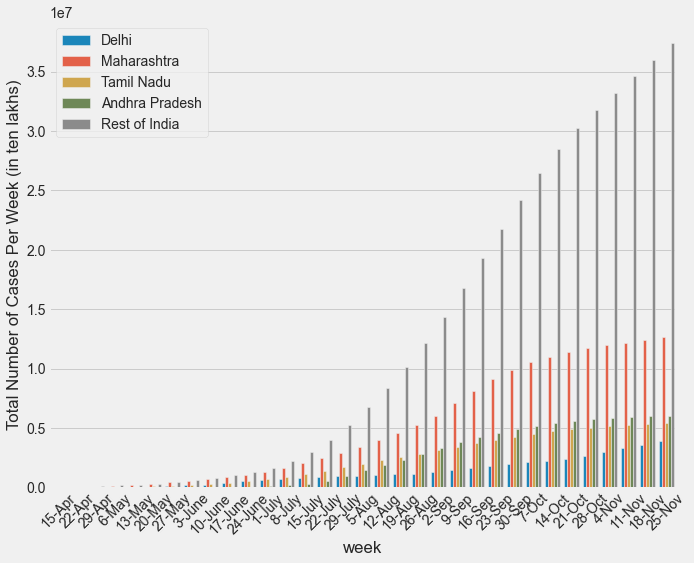

In [65]:
plt.figure(figsize=(10,8))
sns.barplot(x='week',y='value', hue='variable',data=plot_by_week2)
plt.ylabel("Total Number of Cases Per Week (in ten lakhs)")
plt.xticks(rotation = 45)
plt.legend(title="")
plt.savefig('Images/bar_weekly.png', dpi=300, bbox_inches='tight')
plt.show()

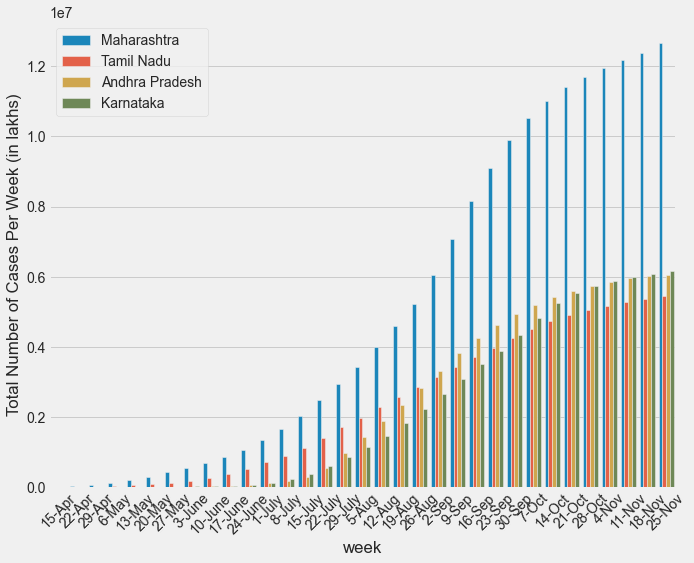

In [66]:
plt.figure(figsize=(10,8))
sns.barplot(x='week',y='value', hue='variable',data=plot_by_week2_major)
plt.ylabel("Total Number of Cases Per Week (in lakhs)")
plt.xticks(rotation = 45)
plt.legend(title="")
plt.savefig('Images/major_weekly.png', dpi=300, bbox_inches='tight')
plt.show()

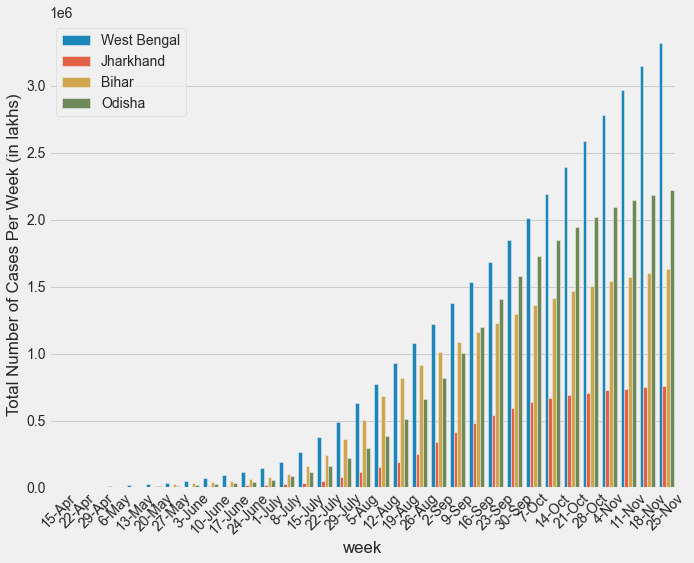

In [67]:
plt.figure(figsize=(10,8))
sns.barplot(x='week',y='value', hue='variable',data=plot_by_week2_east)
plt.ylabel("Total Number of Cases Per Week (in lakhs)")
plt.xticks(rotation = 45)
plt.legend(title="")
plt.savefig('Images/eastern_weekly.png', dpi=300, bbox_inches='tight')
plt.show()

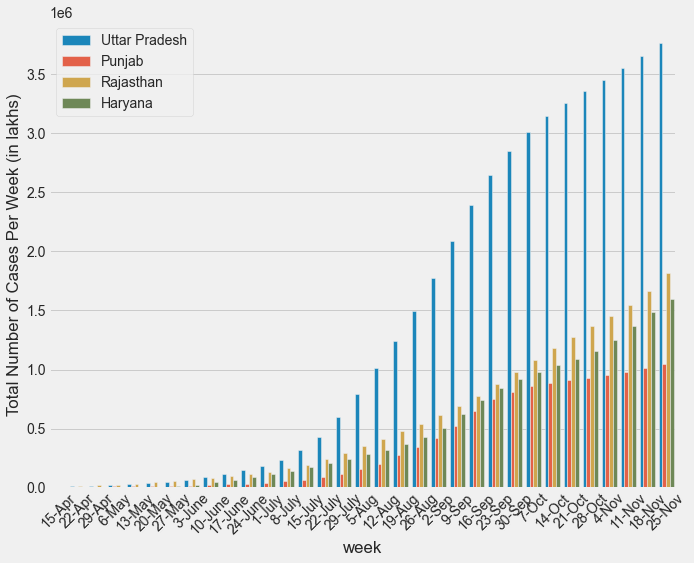

In [68]:
plt.figure(figsize=(10,8))
sns.barplot(x='week',y='value', hue='variable',data=plot_by_week2_north)
plt.ylabel("Total Number of Cases Per Week (in lakhs)")
plt.xticks(rotation = 45)
plt.legend(title="")
plt.savefig('Images/north_weekly.png', dpi=300, bbox_inches='tight')
plt.show()

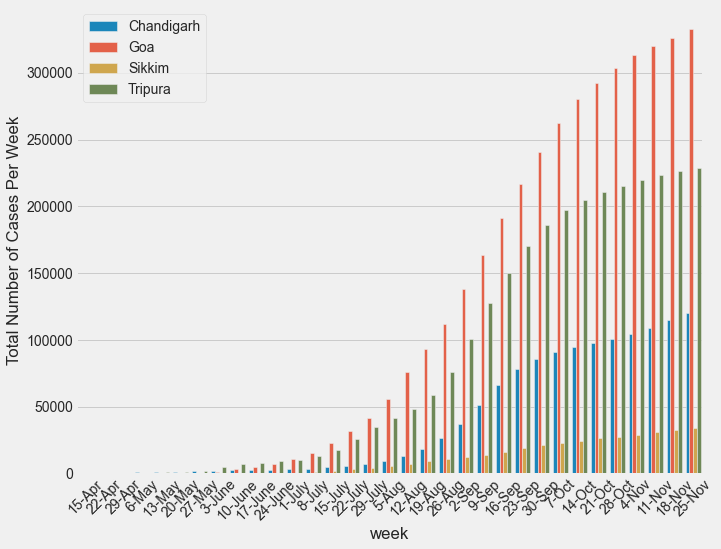

In [69]:
plt.figure(figsize=(10,8))
sns.barplot(x='week',y='value', hue='variable',data=plot_by_week2_small)
plt.ylabel("Total Number of Cases Per Week")
plt.xticks(rotation = 45)
plt.legend(title="")
plt.savefig('Images/small_weekly.png', dpi=300, bbox_inches='tight')
plt.show()

In [62]:
plot_by_week

Delhi  Maharashtra  Tamil Nadu  Andhra Pradesh  Rest of India     week
week                                                                          
1       12463        24657        9405            4294          55257   15-Apr
2       17945        48406       12306            7257          89201   22-Apr
3       27575        81048       18399           10673         129658   29-Apr
4       43632       135120       42046           13156         185240    6-May
5       62443       205790       71296           15975         251181   13-May
6       86001       312745      103230           19180         343626   20-May
7      122616       436316      142903           24060         459555   27-May
8      183648       562653      201456           30573         623907   3-June
9      258599       706887      285021           40032         819039  10-June
10     374032       871108      383304           56214        1027749  17-June
11     536438      1076058      524504           82123        1298628  24-June
12     661499      1353345      718459          119293        1662287   1-July
13     761041      1671856      913280          180198        2208074   8-July
14     839213      2050262     1128505          295143        2981831  15-July
15     898528      2495147     1401024          564268        4001520  22-July
16     948461      2949150     1720212          977736        5264923  29-July
17     999330      3439191     1996536         1446968        6743209    5-Aug
18    1053882      4001751     2283874         1904177        8410060   12-Aug
19    1110847      4592581     2572115         2342639       10186151   19-Aug
20    1186355      5241608     2866760         2824516       12132085   26-Aug
21    1297323      6055666     3162039         3334855       14331818    2-Sep
22    1467445      7093044     3441423         3829768       16757728    9-Sep
23    1668463      8153450     3716203         4262744       19311305   16-Sep
24    1846971      9101850     3985956         4627261       21751517   23-Sep
25    1995567      9895933     4261614         4943642       24167473   30-Sep
26    2124955     10527277     4522353         5213512       26440487    7-Oct
27    2269168     11021970     4752137         5426339       28521907   14-Oct
28    2438572     11417561     4921443         5600428       30277242   21-Oct
29    2667199     11704285     5053455         5742039       31770535   28-Oct
30    2966383     11961915     5173684         5866311       33236614    4-Nov
31    3309992     12177266     5280094         5956955       34631890   11-Nov
32    3613847     12380803     5366470         6018260       35960483   18-Nov

In [26]:
new_cases_major = major_affected.copy()
for row in range(1,len(major_affected.index)):
    new_cases_major.iloc[row,0:5] = (major_affected.iloc[row,0:5]-major_affected.iloc[row-1,0:5]).astype(int)

new_cases_north = northern_states.copy()
for row in range(1,len(northern_states.index)):
    new_cases_north.iloc[row,0:4] = (northern_states.iloc[row,0:4]-northern_states.iloc[row-1,0:4]).astype(int)

new_cases_east = eastern_states.copy()
for row in range(1,len(eastern_states.index)):
    new_cases_east.iloc[row,0:4] = (eastern_states.iloc[row,0:4]-eastern_states.iloc[row-1,0:4]).astype(int)

new_cases_small = small_states.copy()
for row in range(1,len(small_states.index)):
    new_cases_small.iloc[row,0:4] = (small_states.iloc[row,0:4]-small_states.iloc[row-1,0:4]).astype(int)



In [27]:
err_del =[new_cases_major['Delhi'].iloc[0]]
err_mah = [new_cases_major['Maharashtra'].iloc[0]]
err_tn=[new_cases_major['Tamil Nadu'].iloc[0]]
err_ap=[new_cases_major["Andhra Pradesh"].iloc[0]]
err_kr=[new_cases_major['Karnataka'].iloc[0]]


for i in range(1,len(major_affected.index)):
    err_del.append(new_cases_major['Delhi'].iloc[i]-new_cases_major['Delhi'].iloc[i-1])
    err_mah.append(new_cases_major['Maharashtra'].iloc[i]-new_cases_major['Maharashtra'].iloc[i-1])
    err_tn.append(new_cases_major['Tamil Nadu'].iloc[i]-new_cases_major['Tamil Nadu'].iloc[i-1])
    err_ap.append(new_cases_major["Andhra Pradesh"].iloc[i]-new_cases_major["Andhra Pradesh"].iloc[i-1])
    err_kr.append(new_cases_major['Karnataka'].iloc[i]-new_cases_major['Karnataka'].iloc[i-1])

error = pd.DataFrame({"err_del":err_del, "err_mah":err_mah, "err_tn":err_tn, "err_kr":err_kr, "err_ap":err_ap}, index = new_cases_major.index, dtype = np.float32)

error['week'] = new_cases_major['week']
error = error.groupby(['week']).apply(np.std).drop(labels='week',axis=1)

week_avg = new_cases_major.groupby(['week']).sum()
week_avg['week'] = starting_week_dates
week_avg.drop(week_avg.tail(1).index,inplace=True)

for col in week_avg:
    if (col == 'week'):
        continue
    else:
        week_avg[col] = (week_avg[col]/7).astype(int)

week_avg = pd.concat([week_avg, error], axis=1)
week_avg.drop(week_avg.tail(1).index,inplace=True)


import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Bar(x=list(range(1,weeks+1)),
                y=week_avg['Delhi'],
                     error_y=dict(type='data', array=np.array(week_avg['err_del'])
                                  ,visible = True,thickness =1),
                name='Delhi',
                marker_color='rgb(55, 83, 109)'
                ))
fig.add_trace(go.Bar(x=list(range(1,weeks+1)),
                y=week_avg['Maharashtra'],
                error_y=dict(type='data', array=np.array(week_avg['err_mah'])
                             ,visible = True, thickness =1),
                name='Maharashtra',
                marker_color='rgb(0,125,150)'
                ))
fig.add_trace(go.Bar(x=list(range(1,weeks+1)),
                y=week_avg['Tamil Nadu'],
                error_y=dict(type='data', array=np.array(week_avg['err_tn'])
                             ,visible = True, thickness =1),
                name='Tamil Nadu',
                marker_color='rgb(13, 255, 20)'
                ))
fig.add_trace(go.Bar(x=list(range(1,weeks+1)),
                y=week_avg['Andhra Pradesh'],
                error_y=dict(type='data', array=np.array(week_avg['err_ap'])
                             ,visible = True, thickness =1),
                name='Andhra Pradesh',
                marker_color='rgb(0, 200, 70)'
                ))
fig.add_trace(go.Bar(x=list(range(1,weeks+1)),
                y=week_avg['Karnataka'],
                error_y=dict(type='data', array=np.array(week_avg['err_kr']) 
                             ,visible = True, thickness =1),
                name='Karnataka',
                marker_color='rgb(255, 10, 10)'
                ))

fig.update_layout(
    title='Distribution of Covid-19 New Cases Across Major Affected States' ,
    
    xaxis=dict(tickfont_size=14,
#                title = 'Week',
               ticktext= week_avg['week'],
               tickvals = list(range(1,new_cases_major.shape[0]))
              ),    
    yaxis=dict(
        title='Average new cases per week',
        titlefont_size=16,
        tickfont_size=14,
    ),
    legend=dict(
        x=0,
        y=1.0,
        bgcolor='rgba(255, 255, 255, 0)',
        bordercolor='rgba(255, 255, 255, 0)'
    ),
    barmode='group',
    bargap=0.15, # gap between bars of adjacent location coordinates.
    bargroupgap=0.1,# gap between bars of the same location coordinate.
    shapes=[
        dict(
            type="rect",
            # x-reference is assigned to the x-values
            xref="x",
            # y-reference is assigned to the plot paper [0,1]
            yref="paper",
            x0="Jul 2020",
            y0=0,
            x1="Apr 2020",
            y1=1,
            fillcolor="LightSalmon",
            opacity=0.5,
            layer="below",
            line_width=0,
        )
    ],
    annotations=[
        dict(
#             x=15.5,
#             y=400,
            xref="x",
            yref="y",
            text="",
#             family="sans serif",
            showarrow=False
        )
    ]
)

# fig.update_xaxes(week_avg['week'])
fig.write_image('Images/major_affected_weekly_avg.png',width=800, height=600)
fig.show()


In [28]:
# North - "Uttar Pradesh", "Punjab",  "Rajasthan", "Haryana"

err_up =[new_cases_north['Uttar Pradesh'].iloc[0]]
err_pun = [new_cases_north['Punjab'].iloc[0]]
err_rj=[new_cases_north['Rajasthan'].iloc[0]]
err_hr=[new_cases_north["Haryana"].iloc[0]]


for i in range(1,len(northern_states.index)):
    err_up.append(new_cases_north['Uttar Pradesh'].iloc[i]-new_cases_north['Uttar Pradesh'].iloc[i-1])
    err_pun.append(new_cases_north['Punjab'].iloc[i]-new_cases_north['Punjab'].iloc[i-1])
    err_rj.append(new_cases_north['Rajasthan'].iloc[i]-new_cases_north['Rajasthan'].iloc[i-1])
    err_hr.append(new_cases_north["Haryana"].iloc[i]-new_cases_north["Haryana"].iloc[i-1])

error = pd.DataFrame({"err_up":err_up, "err_pun":err_pun, "err_rj":err_rj, "err_hr":err_hr}, index = new_cases_north.index, dtype = np.float32)

error['week'] = new_cases_north['week']
error = error.groupby(['week']).apply(np.std).drop(labels='week',axis=1)

week_avg = new_cases_north.groupby(['week']).sum()
week_avg['week'] = starting_week_dates
week_avg.drop(week_avg.tail(1).index,inplace=True)

for col in week_avg:
    if (col == 'week'):
        continue
    else:
        week_avg[col] = (week_avg[col]/7).astype(int)

week_avg = pd.concat([week_avg, error], axis=1)
week_avg.drop(week_avg.tail(1).index,inplace=True)


import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Bar(x=list(range(1,weeks+1)),
                y=week_avg['Uttar Pradesh'],
                     error_y=dict(type='data', array=np.array(week_avg['err_up'])
                                  ,visible = True,thickness =1),
                name='Uttar Pradesh',
                marker_color='rgb(55, 83, 109)'
                ))
fig.add_trace(go.Bar(x=list(range(1,weeks+1)),
                y=week_avg['Punjab'],
                error_y=dict(type='data', array=np.array(week_avg['err_pun'])
                             ,visible = True, thickness =1),
                name='Punjab',
                marker_color='rgb(0,125,150)'
                ))
fig.add_trace(go.Bar(x=list(range(1,weeks+1)),
                y=week_avg['Rajasthan'],
                error_y=dict(type='data', array=np.array(week_avg['err_rj'])
                             ,visible = True, thickness =1),
                name='Rajasthan',
                marker_color='rgb(13, 255, 20)'
                ))
fig.add_trace(go.Bar(x=list(range(1,weeks+1)),
                y=week_avg['Haryana'],
                error_y=dict(type='data', array=np.array(week_avg['err_hr'])
                             ,visible = True, thickness =1),
                name='Haryana',
                marker_color='rgb(0, 200, 70)'
                ))

fig.update_layout(
    title='Distribution of Covid-19 New Cases Across Northern States' ,
    
    xaxis=dict(tickfont_size=14,
#                title = 'Week',
               ticktext= week_avg['week'],
               tickvals = list(range(1,new_cases_north.shape[0]))
              ),    
    yaxis=dict(
        title='Average new cases per week',
        titlefont_size=16,
        tickfont_size=14,
    ),
    legend=dict(
        x=0,
        y=1.0,
        bgcolor='rgba(255, 255, 255, 0)',
        bordercolor='rgba(255, 255, 255, 0)'
    ),
    barmode='group',
    bargap=0.15, # gap between bars of adjacent location coordinates.
    bargroupgap=0.1,# gap between bars of the same location coordinate.
    shapes=[
        dict(
            type="rect",
            # x-reference is assigned to the x-values
            xref="x",
            # y-reference is assigned to the plot paper [0,1]
            yref="paper",
            x0="Jul 2020",
            y0=0,
            x1="Apr 2020",
            y1=1,
            fillcolor="LightSalmon",
            opacity=0.5,
            layer="below",
            line_width=0,
        )
    ],
    annotations=[
        dict(
#             x=15.5,
#             y=400,
            xref="x",
            yref="y",
            text="",
#             family="sans serif",
            showarrow=False
        )
    ]
)

# fig.update_xaxes(week_avg['week'])
fig.write_image('Images/north_weekly_avg.png',width=800, height=600)
fig.show()


In [29]:
# East - "West Bengal", "Jharkhand", "Bihar", "Odisha"

err_wb =[new_cases_east['West Bengal'].iloc[0]]
err_jk = [new_cases_east['Jharkhand'].iloc[0]]
err_bh=[new_cases_east['Bihar'].iloc[0]]
err_od=[new_cases_east["Odisha"].iloc[0]]


for i in range(1,len(eastern_states.index)):
    err_wb.append(new_cases_east['West Bengal'].iloc[i]-new_cases_east['West Bengal'].iloc[i-1])
    err_jk.append(new_cases_east['Jharkhand'].iloc[i]-new_cases_east['Jharkhand'].iloc[i-1])
    err_bh.append(new_cases_east['Bihar'].iloc[i]-new_cases_east['Bihar'].iloc[i-1])
    err_od.append(new_cases_east["Odisha"].iloc[i]-new_cases_east["Odisha"].iloc[i-1])

error = pd.DataFrame({"err_wb":err_wb, "err_jk":err_jk, "err_bh":err_bh, "err_od":err_od}, index = new_cases_east.index, dtype = np.float32)

error['week'] = new_cases_east['week']
error = error.groupby(['week']).apply(np.std).drop(labels='week',axis=1)

week_avg = new_cases_east.groupby(['week']).sum()
week_avg['week'] = starting_week_dates
week_avg.drop(week_avg.tail(1).index,inplace=True)

for col in week_avg:
    if (col == 'week'):
        continue
    else:
        week_avg[col] = (week_avg[col]/7).astype(int)

week_avg = pd.concat([week_avg, error], axis=1)
week_avg.drop(week_avg.tail(1).index,inplace=True)


import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Bar(x=list(range(1,weeks+1)),
                y=week_avg['West Bengal'],
                     error_y=dict(type='data', array=np.array(week_avg['err_wb'])
                                  ,visible = True,thickness =1),
                name='West Bengal',
                marker_color='rgb(55, 83, 109)'
                ))
fig.add_trace(go.Bar(x=list(range(1,weeks+1)),
                y=week_avg['Jharkhand'],
                error_y=dict(type='data', array=np.array(week_avg['err_jk'])
                             ,visible = True, thickness =1),
                name='Jharkhand',
                marker_color='rgb(0,125,150)'
                ))
fig.add_trace(go.Bar(x=list(range(1,weeks+1)),
                y=week_avg['Bihar'],
                error_y=dict(type='data', array=np.array(week_avg['err_bh'])
                             ,visible = True, thickness =1),
                name='Bihar',
                marker_color='rgb(13, 255, 20)'
                ))
fig.add_trace(go.Bar(x=list(range(1,weeks+1)),
                y=week_avg['Odisha'],
                error_y=dict(type='data', array=np.array(week_avg['err_od'])
                             ,visible = True, thickness =1),
                name='Odisha',
                marker_color='rgb(0, 200, 70)'
                ))

fig.update_layout(
    title='Distribution of Covid-19 New Cases Across Eastern States' ,
    
    xaxis=dict(tickfont_size=14,
#                title = 'Week',
               ticktext= week_avg['week'],
               tickvals = list(range(1,new_cases_east.shape[0]))
              ),    
    yaxis=dict(
        title='Average new cases per week',
        titlefont_size=16,
        tickfont_size=14,
    ),
    legend=dict(
        x=0,
        y=1.0,
        bgcolor='rgba(255, 255, 255, 0)',
        bordercolor='rgba(255, 255, 255, 0)'
    ),
    barmode='group',
    bargap=0.15, # gap between bars of adjacent location coordinates.
    bargroupgap=0.1,# gap between bars of the same location coordinate.
    shapes=[
        dict(
            type="rect",
            # x-reference is assigned to the x-values
            xref="x",
            # y-reference is assigned to the plot paper [0,1]
            yref="paper",
            x0="Jul 2020",
            y0=0,
            x1="Apr 2020",
            y1=1,
            fillcolor="LightSalmon",
            opacity=0.5,
            layer="below",
            line_width=0,
        )
    ],
    annotations=[
        dict(
#             x=15.5,
#             y=400,
            xref="x",
            yref="y",
            text="",
#             family="sans serif",
            showarrow=False
        )
    ]
)

# fig.update_xaxes(week_avg['week'])
fig.write_image('Images/east_weekly_avg.png',width=800, height=600)
fig.show()


In [30]:
# Small - "Chandigarh", "Goa", "Sikkim", "Tripura"

err_ch =[new_cases_small['Chandigarh'].iloc[0]]
err_goa = [new_cases_small['Goa'].iloc[0]]
err_sk=[new_cases_small['Sikkim'].iloc[0]]
err_tp=[new_cases_small["Tripura"].iloc[0]]


for i in range(1,len(eastern_states.index)):
    err_ch.append(new_cases_small['Chandigarh'].iloc[i]-new_cases_small['Chandigarh'].iloc[i-1])
    err_goa.append(new_cases_small['Goa'].iloc[i]-new_cases_small['Goa'].iloc[i-1])
    err_sk.append(new_cases_small['Sikkim'].iloc[i]-new_cases_small['Sikkim'].iloc[i-1])
    err_tp.append(new_cases_small["Tripura"].iloc[i]-new_cases_small["Tripura"].iloc[i-1])

error = pd.DataFrame({"err_ch":err_ch, "err_goa":err_goa, "err_sk":err_sk, "err_tp":err_tp}, index = new_cases_small.index, dtype = np.float32)

error['week'] = new_cases_small['week']
error = error.groupby(['week']).apply(np.std).drop(labels='week',axis=1)

week_avg = new_cases_small.groupby(['week']).sum()
week_avg['week'] = starting_week_dates
week_avg.drop(week_avg.tail(1).index,inplace=True)

for col in week_avg:
    if (col == 'week'):
        continue
    else:
        week_avg[col] = (week_avg[col]/7).astype(int)

week_avg = pd.concat([week_avg, error], axis=1)
week_avg.drop(week_avg.tail(1).index,inplace=True)


import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Bar(x=list(range(1,weeks+1)),
                y=week_avg['Chandigarh'],
                     error_y=dict(type='data', array=np.array(week_avg['err_ch'])
                                  ,visible = True,thickness =1),
                name='Chandigarh',
                marker_color='rgb(55, 83, 109)'
                ))
fig.add_trace(go.Bar(x=list(range(1,weeks+1)),
                y=week_avg['Goa'],
                error_y=dict(type='data', array=np.array(week_avg['err_goa'])
                             ,visible = True, thickness =1),
                name='Goa',
                marker_color='rgb(0,125,150)'
                ))
fig.add_trace(go.Bar(x=list(range(1,weeks+1)),
                y=week_avg['Sikkim'],
                error_y=dict(type='data', array=np.array(week_avg['err_sk'])
                             ,visible = True, thickness =1),
                name='Sikkim',
                marker_color='rgb(13, 255, 20)'
                ))
fig.add_trace(go.Bar(x=list(range(1,weeks+1)),
                y=week_avg['Tripura'],
                error_y=dict(type='data', array=np.array(week_avg['err_tp'])
                             ,visible = True, thickness =1),
                name='Tripura',
                marker_color='rgb(0, 200, 70)'
                ))

fig.update_layout(
    title='Distribution of Covid-19 New Cases Across Small States' ,
    
    xaxis=dict(tickfont_size=14,
#                title = 'Week',
               ticktext= week_avg['week'],
               tickvals = list(range(1,new_cases_small.shape[0]))
              ),    
    yaxis=dict(
        title='Average new cases per week',
        titlefont_size=16,
        tickfont_size=14,
    ),
    legend=dict(
        x=0,
        y=1.0,
        bgcolor='rgba(255, 255, 255, 0)',
        bordercolor='rgba(255, 255, 255, 0)'
    ),
    barmode='group',
    bargap=0.15, # gap between bars of adjacent location coordinates.
    bargroupgap=0.1,# gap between bars of the same location coordinate.
    shapes=[
        dict(
            type="rect",
            # x-reference is assigned to the x-values
            xref="x",
            # y-reference is assigned to the plot paper [0,1]
            yref="paper",
            x0="Jul 2020",
            y0=0,
            x1="Apr 2020",
            y1=1,
            fillcolor="LightSalmon",
            opacity=0.5,
            layer="below",
            line_width=0,
        )
    ],
    annotations=[
        dict(
#             x=15.5,
#             y=400,
            xref="x",
            yref="y",
            text="",
#             family="sans serif",
            showarrow=False
        )
    ]
)

# fig.update_xaxes(week_avg['week'])
fig.write_image('Images/small_weekly_avg.png',width=800, height=600)
fig.show()


In [31]:
error = pd.DataFrame({"err_del":err_del, "err_mah":err_mah, "err_tn":err_tn, "err_rest":err_rest, "err_ap":err_ap}, index = new_cases.index, dtype = np.float32)

NameError: name 'err_rest' is not defined

In [32]:
error['week'] = new_cases['week']
error = error.groupby(['week']).apply(np.std).drop(labels='week',axis=1)


NameError: name 'new_cases' is not defined

In [33]:
week_avg = new_cases.groupby(['week']).sum()
week_avg['week'] = starting_week_dates
week_avg.drop(week_avg.tail(1).index,inplace=True)
week_avg

NameError: name 'new_cases' is not defined

In [34]:
for col in week_avg:
    if (col == 'week'):
        continue
    else:
        week_avg[col] = (week_avg[col]/7).astype(int)
week_avg

Chandigarh  Goa  Sikkim  Tripura    week  err_ch  err_goa  err_sk  \
week                                                                      
1              0    0       0        0  10-Mar       0        0       0   
2              0    0       0        0  17-Mar       0        0       0   
3              0    0       0        0  24-Mar       0        0       0   
4              0    0       0        0  31-Mar       0        0       0   
5              0    0       0        0  07-Apr       0        0       0   
6              0    0       0        0  14-Apr       0        0       0   
7              0    0       0        0  21-Apr       0        0       0   
8              1    0       0        0  28-Apr       2        0       0   
9              1    0       0        2  05-May       1        0       0   
10             0    0       0        0  12-May       0        0       0   
11             0    0       0        0  19-May       1        0       0   
12             1    0       0        2  26-May       1        0       0   
13             0    4       0        9  02-Jun       0        6       0   
14             0    5       1        5  09-Jun       0        1       3   
15             1    3       0        2  16-Jun       1        2       0   
16             0    9       0        2  23-Jun       0        7       0   
17             0   11       0        4  30-Jun       0       15       1   
18             1   14       0        9  07-Jul       1        4       1   
19             3   24       2       16  14-Jul       2        4       2   
20             3   24       5       20  21-Jul       2        3       6   
21             4   34       2       30  28-Jul       1        7       2   
22             8   44       4       17  04-Aug       2       18       5   
23            11   59       6       20  11-Aug       1       14      10   
24            16   48       4       34  18-Aug       2        8       2   
25            25   61       4       55  25-Aug       8       15       3   
26            32   78       5       78  01-Sep       5       19       5   
27            45   76       3       74  08-Sep      13       23       1   
28            42   78       7       63  15-Sep      12       21       6   
29            30   72       8       54  22-Sep       7       20       3   
30            18   68       6       43  29-Sep       4       16       2   
31            14   62       3       29  06-Oct       4       12       1   
32             9   45       4       22  13-Oct       2       10       3   
33             8   33       4       14  20-Oct       2        7       3   

      err_tp  
week          
1          0  
2          0  
3          0  
4          0  
5          0  
6          0  
7          0  
8          0  
9          2  
10         1  
11         1  
12         1  
13        12  
14         4  
15         3  
16         2  
17         5  
18        12  
19        13  
20        10  
21         9  
22         4  
23         6  
24         9  
25        11  
26        18  
27        25  
28        30  
29        20  
30        18  
31         8  
32         7  
33         6

In [35]:
week_avg = pd.concat([week_avg, error], axis=1)

In [36]:
week_avg.drop(week_avg.tail(1).index,inplace=True)
week_avg

Chandigarh   Goa  Sikkim  Tripura    week  err_ch  err_goa  err_sk  \
week                                                                       
1            0.0   0.0     0.0      0.0  10-Mar     0.0      0.0     0.0   
2            0.0   0.0     0.0      0.0  17-Mar     0.0      0.0     0.0   
3            0.0   0.0     0.0      0.0  24-Mar     0.0      0.0     0.0   
4            0.0   0.0     0.0      0.0  31-Mar     0.0      0.0     0.0   
5            0.0   0.0     0.0      0.0  07-Apr     0.0      0.0     0.0   
6            0.0   0.0     0.0      0.0  14-Apr     0.0      0.0     0.0   
7            0.0   0.0     0.0      0.0  21-Apr     0.0      0.0     0.0   
8            1.0   0.0     0.0      0.0  28-Apr     2.0      0.0     0.0   
9            1.0   0.0     0.0      2.0  05-May     1.0      0.0     0.0   
10           0.0   0.0     0.0      0.0  12-May     0.0      0.0     0.0   
11           0.0   0.0     0.0      0.0  19-May     1.0      0.0     0.0   
12           1.0   0.0     0.0      2.0  26-May     1.0      0.0     0.0   
13           0.0   4.0     0.0      9.0  02-Jun     0.0      6.0     0.0   
14           0.0   5.0     1.0      5.0  09-Jun     0.0      1.0     3.0   
15           1.0   3.0     0.0      2.0  16-Jun     1.0      2.0     0.0   
16           0.0   9.0     0.0      2.0  23-Jun     0.0      7.0     0.0   
17           0.0  11.0     0.0      4.0  30-Jun     0.0     15.0     1.0   
18           1.0  14.0     0.0      9.0  07-Jul     1.0      4.0     1.0   
19           3.0  24.0     2.0     16.0  14-Jul     2.0      4.0     2.0   
20           3.0  24.0     5.0     20.0  21-Jul     2.0      3.0     6.0   
21           4.0  34.0     2.0     30.0  28-Jul     1.0      7.0     2.0   
22           8.0  44.0     4.0     17.0  04-Aug     2.0     18.0     5.0   
23          11.0  59.0     6.0     20.0  11-Aug     1.0     14.0    10.0   
24          16.0  48.0     4.0     34.0  18-Aug     2.0      8.0     2.0   
25          25.0  61.0     4.0     55.0  25-Aug     8.0     15.0     3.0   
26          32.0  78.0     5.0     78.0  01-Sep     5.0     19.0     5.0   
27          45.0  76.0     3.0     74.0  08-Sep    13.0     23.0     1.0   
28          42.0  78.0     7.0     63.0  15-Sep    12.0     21.0     6.0   
29          30.0  72.0     8.0     54.0  22-Sep     7.0     20.0     3.0   
30          18.0  68.0     6.0     43.0  29-Sep     4.0     16.0     2.0   
31          14.0  62.0     3.0     29.0  06-Oct     4.0     12.0     1.0   
32           9.0  45.0     4.0     22.0  13-Oct     2.0     10.0     3.0   
33           8.0  33.0     4.0     14.0  20-Oct     2.0      7.0     3.0   

      err_tp     err_ch     err_goa     err_sk      err_tp  
week                                                        
1        0.0   0.000000    0.000000   0.000000    0.000000  
2        0.0   1.958758    0.000000   0.000000    0.000000  
3        0.0   0.638877    1.927248   0.000000    0.000000  
4        0.0   2.563480    0.534522   0.000000    0.000000  
5        0.0   0.451754    0.000000   0.000000    0.755929  
6        0.0   1.124858    0.000000   0.000000    0.000000  
7        0.0   1.498298    0.000000   0.000000    0.000000  
8        0.0  17.435596    0.000000   0.000000    3.452299  
9        2.0   8.263517    0.000000   0.000000   20.735457  
10       1.0   6.436503    4.861343   0.000000    7.591617  
11       1.0   7.953949    4.323642   0.534522    7.205440  
12       1.0  13.434649    3.539860   0.000000   11.432142  
13      12.0   3.907084   44.563644   2.000000   90.263786  
14       4.0   4.199125   10.815710  26.184588   28.738796  
15       3.0  10.524995   18.349220   3.697765   21.624816  
16       2.0   2.531435   50.743050   3.585686   18.774712  
17       5.0   2.962349  111.220502   8.907690   36.780652  
18      12.0  12.360239   29.782203  11.399964   85.889345  
19      13.0  20.138297   31.190004  17.827976   97.109658  
20      10.0  18.266731   27.504360  46.151481   74.743097  
21 

In [37]:
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Bar(x=list(range(1,weeks+1)),
                y=week_avg['Delhi'],
                     error_y=dict(type='data', array=np.array(week_avg['err_del'])
                                  ,visible = True,thickness =1),
                name='Delhi',
                marker_color='rgb(55, 83, 109)'
                ))
fig.add_trace(go.Bar(x=list(range(1,weeks+1)),
                y=week_avg['Maharashtra'],
                error_y=dict(type='data', array=np.array(week_avg['err_mah'])
                             ,visible = True, thickness =1),
                name='Maharashtra',
                marker_color='rgb(0,125,150)'
                ))
fig.add_trace(go.Bar(x=list(range(1,weeks+1)),
                y=week_avg['Tamil Nadu'],
                error_y=dict(type='data', array=np.array(week_avg['err_tn'])
                             ,visible = True, thickness =1),
                name='Tamil Nadu',
                marker_color='rgb(13, 255, 20)'
                ))
fig.add_trace(go.Bar(x=list(range(1,weeks+1)),
                y=week_avg['Andhra Pradesh'],
                error_y=dict(type='data', array=np.array(week_avg['err_ap'])
                             ,visible = True, thickness =1),
                name='Andhra Pradesh',
                marker_color='rgb(0, 200, 70)'
                ))
# fig.add_trace(go.Bar(x=list(range(1,weeks+1)),
#                 y=week_avg['Rest of India'],
#                 error_y=dict(type='data', array=np.array(week_avg['err_rest']) 
#                              ,visible = True, thickness =1),
#                 name='Rest of India',
#                 marker_color='rgb(255, 10, 10)'
#                 ))

fig.update_layout(
    title='Distribution of Covid-19 Cases Across India' ,
    
    xaxis=dict(tickfont_size=14,
#                title = 'Week',
               ticktext= week_avg['week'],
               tickvals = list(range(1,plot_cases.shape[0]))
              ),    
    yaxis=dict(
        title='Average new cases per week',
        titlefont_size=16,
        tickfont_size=14,
    ),
    legend=dict(
        x=0,
        y=1.0,
        bgcolor='rgba(255, 255, 255, 0)',
        bordercolor='rgba(255, 255, 255, 0)'
    ),
    barmode='group',
    bargap=0.15, # gap between bars of adjacent location coordinates.
    bargroupgap=0.1,# gap between bars of the same location coordinate.
    shapes=[
        dict(
            type="rect",
            # x-reference is assigned to the x-values
            xref="x",
            # y-reference is assigned to the plot paper [0,1]
            yref="paper",
            x0="Jul 2020",
            y0=0,
            x1="Apr 2020",
            y1=1,
            fillcolor="LightSalmon",
            opacity=0.5,
            layer="below",
            line_width=0,
        )
    ],
    annotations=[
        dict(
#             x=15.5,
#             y=400,
            xref="x",
            yref="y",
            text="",
#             family="sans serif",
            showarrow=False
        )
    ]
)

# fig.update_xaxes(week_avg['week'])
fig.write_image('Images/weekly_avg.png',width=800, height=600)
fig.show()


KeyError: 'Delhi'

In [217]:
week_avg['week']

week
1      10-Mar
2      17-Mar
3      24-Mar
4      31-Mar
5      07-Apr
6      14-Apr
7      21-Apr
8      28-Apr
9       5-May
10     12-May
11     19-May
12     26-May
13     2-June
14     9-June
15    16-June
16    23-June
17    30-June
18     7-July
19    14-July
20    21-July
21    28-July
22      4-Aug
23     11-Aug
24     18-Aug
25     25-Aug
26      1-Sep
Name: week, dtype: object

In [218]:
to

NameError: name 'to' is not defined